In [1]:
path_fruits = "/home/melidia/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/"

In [5]:
path_mnist = "/home/melidia/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4"

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
import os
import cv2
import numpy as np

path_fruits_train = path_fruits + "Training"
path_fruits_test = path_fruits + "Test"

number_train = {}
number_test = {}

images_fruits_train = []
images_fruits_test = []
labels_fruits_train = []
labels_fruits_test = []

def process_images(path, images_list, labels_list, number_dict, image_size):
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            if (folder_name.split(" "))[0] not in number_dict:
                number_dict[(folder_name.split(" "))[0]] = 0
            number_dict[(folder_name.split(" "))[0]] += len(files)
            for file in files:
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path, cv2.IMREAD_COLOR)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                    images_list.append(img)
                    labels_list.append((folder_name.split(" "))[0])

process_images(path_fruits_train, images_fruits_train, labels_fruits_train, number_train, (20, 20))

process_images(path_fruits_test, images_fruits_test, labels_fruits_test, number_test, (20, 20))

images_fruits_train = np.array(images_fruits_train)
labels_fruits_train = np.array(labels_fruits_train)
images_fruits_test = np.array(images_fruits_test)
labels_fruits_test = np.array(labels_fruits_test)

images_fruits_train = scaler.fit_transform([i.flatten() for i in images_fruits_train])
images_fruits_test = scaler.fit_transform([i.flatten() for i in images_fruits_test])

print(f"Numărul de imagini pentru antrenare: {len(images_fruits_train)}")
print(f"Numărul de imagini pentru test: {len(images_fruits_test)}")


Numărul de imagini pentru antrenare: 70491
Numărul de imagini pentru test: 23619


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=27)
pca_train_features_fruits = pca.fit_transform(images_fruits_train)
pca_test_features_fruits = pca.transform(images_fruits_test)

In [6]:
import cv2
import numpy as np
import os
import pandas as pd

hu_moments = []
path = path_fruits + "Training"
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        for file in files:
            file_path = os.path.join(folder_path, file)
            image = cv2.imread(file_path, cv2.IMREAD_COLOR)
            im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            _, im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
            moments = cv2.moments(im)
            humoments = cv2.HuMoments(moments)
            for i in range(0, 7):
                humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
            hu_moments.append(humoments)
            
hu_moments_test = []
path = path_fruits + "Test"
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        for file in files:
            file_path = os.path.join(folder_path, file)
            image = cv2.imread(file_path, cv2.IMREAD_COLOR)
            im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            _, im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
            moments = cv2.moments(im)
            humoments = cv2.HuMoments(moments)
            for i in range(0, 7):
                humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
            hu_moments_test.append(humoments)

/home/melidia/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
hu_moments = [i.flatten() for i in hu_moments]
hu_moments_test = [i.flatten() for i in hu_moments_test]

fruits_results_train = []
fruits_results_test = []

for i in range(len(pca_train_features_fruits)):
    result = np.concatenate((pca_train_features_fruits[i], hu_moments[i]))
    fruits_results_train.append(result)

for i in range(len(pca_test_features_fruits)):
    result = np.concatenate((pca_test_features_fruits[i], hu_moments_test[i]))
    fruits_results_test.append(result)

In [8]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(fruits_results_train)
selector.transform(fruits_results_test)

array([[ 15.29783547,   4.69946066,   7.71163444, ...,  22.6295093 ,
         15.79869101,  22.4975811 ],
       [ 10.152849  ,   6.81861204,   9.34175116, ...,  21.7573614 ,
        -15.02212146,  21.54024196],
       [ 15.95459502,   4.07884344,   8.33279129, ...,  22.33236484,
         15.6643791 ,  22.46275951],
       ...,
       [ -5.87783636,   9.92311606,  -5.92083393, ...,  19.18566359,
        -12.8631953 ,  19.09523817],
       [ -3.63835321,   6.89833488,   4.5759516 , ..., -22.45108906,
        -15.13627596, -21.86000638],
       [ -5.04154873,   7.59983575,   3.50022361, ...,  25.54214168,
        -16.38885702,  23.69974492]])

In [9]:
import pandas as pd

path_mnist_train = path_mnist + "/fashion-mnist_train.csv"
real_df_mnist_train = pd.read_csv(path_mnist_train)

path_mnist_test = path_mnist + "/fashion-mnist_test.csv"
real_df_mnist_test = pd.read_csv(path_mnist_test)

In [10]:
label_train = real_df_mnist_train["label"]
label_test = real_df_mnist_test["label"]

df_mnist_train = real_df_mnist_train.drop(columns=["label"])
df_mnist_test = real_df_mnist_test.drop(columns=["label"])

mnist_train = []
mnist_test = []

for i in range(len(df_mnist_train)):
    mnist_train.append(df_mnist_train.iloc[i].values)

for i in range(len(df_mnist_test)):
    mnist_test.append(df_mnist_test.iloc[i].values)
    
import numpy as np

mnist_train = np.array(mnist_train)
mnist_test = np.array(mnist_test)
mnist_train = scaler.fit_transform([i.flatten() for i in mnist_train])
mnist_test = scaler.fit_transform([i.flatten() for i in mnist_test])

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=27)
pca_train_features_mnist =  pca.fit_transform(mnist_train)
pca_test_features_mnist = pca.transform(mnist_test)

In [12]:
import cv2
import numpy as np
import os
import pandas as pd

hu_moments = []
for pixels in mnist_train:
    im = pixels.reshape(28, 28)
    _, im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
    moments = cv2.moments(im)
    humoments = cv2.HuMoments(moments)
    for i in range(0, 7):
        humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
    hu_moments.append(humoments)
    
hu_moments_test = []
for pixels in mnist_test:
    im = pixels.reshape(28, 28)
    _, im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
    moments = cv2.moments(im)
    humoments = cv2.HuMoments(moments)
    for i in range(0, 7):
        humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
    hu_moments_test.append(humoments)

/tmp/ipykernel_11352/2599199262.py:13: RuntimeWarning: divide by zero encountered in log10
  humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
/tmp/ipykernel_11352/2599199262.py:23: RuntimeWarning: divide by zero encountered in log10
  humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))


In [13]:
hu_moments = [i.flatten() for i in hu_moments]
hu_moments_test = [i.flatten() for i in hu_moments_test]

mnist_results_train = []
mnist_results_test = []

for i in range(len(pca_train_features_mnist)):
    result = np.concatenate((pca_train_features_mnist[i], hu_moments[i]))
    mnist_results_train.append(result)

for i in range(len(pca_test_features_mnist)):
    result = np.concatenate((pca_test_features_mnist[i], hu_moments_test[i]))
    mnist_results_test.append(result)

In [14]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

for i in mnist_results_train:
    i[np.isinf(i)] = 0
for i in mnist_results_test:
    i[np.isinf(i)] = 0

selector.fit_transform(mnist_results_train)
selector.transform(mnist_results_test)

array([[ 15.82149955,  -4.57461181,  -1.04161913, ...,   0.        ,
          0.        ,   0.        ],
       [ -1.43717885, -17.22475493,  -6.10928735, ...,   0.        ,
          0.        ,   0.        ],
       [ -9.82609451,  -3.29484024,  11.49374821, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  4.40546653,  10.04849403,   4.96298865, ...,   0.        ,
          0.        ,   0.        ],
       [ 19.67113607,  17.56683615,   0.33435817, ...,   0.        ,
          0.        ,   0.        ],
       [ 22.44078116,  -1.43838967,   4.58552341, ...,   0.        ,
          0.        ,   0.        ]])

In [15]:
mnist_results_train = scaler.fit_transform([i.flatten() for i in mnist_results_train])
mnist_results_test = scaler.fit_transform([i.flatten() for i in mnist_results_test])

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fruits_y_train_numeric = label_encoder.fit_transform(labels_fruits_train)
fruits_y_test_numeric = label_encoder.transform(labels_fruits_test)

print(label_encoder.classes_)  


['Apple' 'Apricot' 'Avocado' 'Banana' 'Beetroot' 'Blueberry' 'Cabbage'
 'Cactus' 'Cantaloupe' 'Carambula' 'Carrot' 'Cauliflower' 'Cherry'
 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Cucumber' 'Dates' 'Eggplant'
 'Fig' 'Ginger' 'Granadilla' 'Grape' 'Grapefruit' 'Guava' 'Hazelnut'
 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats' 'Lemon' 'Limes'
 'Lychee' 'Mandarine' 'Mango' 'Mangostan' 'Maracuja' 'Melon' 'Mulberry'
 'Nectarine' 'Nut' 'Onion' 'Orange' 'Papaya' 'Passion' 'Peach' 'Pear'
 'Pepino' 'Pepper' 'Physalis' 'Pineapple' 'Pitahaya' 'Plum' 'Pomegranate'
 'Pomelo' 'Potato' 'Quince' 'Rambutan' 'Raspberry' 'Redcurrant' 'Salak'
 'Strawberry' 'Tamarillo' 'Tangelo' 'Tomato' 'Walnut' 'Watermelon'
 'Zucchini']


In [17]:
mnist_y_train_tensor = label_train.to_numpy()
mnist_y_test_tensor = label_test.to_numpy()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_results_train, mnist_y_train_tensor, test_size=0.35, random_state=42, shuffle=True)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fruits_X_train, fruits_X_test, fruits_y_train, fruits_y_test = train_test_split(fruits_results_train, fruits_y_train_numeric, test_size=0.35, random_state=42, shuffle=True)

MLP peste atributele extrase

In [20]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size=34, num_classes=64):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, num_classes) 
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc5(x)
        return x

    def name(self):
        return "MLP"

In [21]:
import torch

use_cuda = torch.cuda.is_available()
Device = "cuda"
model = MLP(input_size=34, num_classes=70).to(Device)

In [22]:
from torch.utils.data import DataLoader, TensorDataset
import torch

train_dataset_fruits = TensorDataset(torch.tensor(fruits_X_train), torch.tensor(fruits_y_train))
val_dataset_fruits = TensorDataset(torch.tensor(fruits_X_test), torch.tensor(fruits_y_test))
test_dataset_fruits = TensorDataset(torch.tensor(fruits_results_test), torch.tensor(fruits_y_test_numeric))

train_loader_fruits = DataLoader(train_dataset_fruits, batch_size=64, shuffle=True)
val_loader_fruits = DataLoader(val_dataset_fruits, batch_size=64, shuffle=True)
test_loader_fruits = DataLoader(test_dataset_fruits, batch_size=64, shuffle=True)

/tmp/ipykernel_11352/57933435.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  train_dataset_fruits = TensorDataset(torch.tensor(fruits_X_train), torch.tensor(fruits_y_train))


EPOCH 1/100
Train Loss: 3.9697, Validation Loss: 3.7344
Saved Best Model
EPOCH 2/100
Train Loss: 3.5508, Validation Loss: 3.3850
Saved Best Model
EPOCH 3/100
Train Loss: 3.2414, Validation Loss: 3.1045
Saved Best Model
EPOCH 4/100
Train Loss: 2.9844, Validation Loss: 2.8684
Saved Best Model
EPOCH 5/100
Train Loss: 2.7669, Validation Loss: 2.6635
Saved Best Model
EPOCH 6/100
Train Loss: 2.5714, Validation Loss: 2.4751
Saved Best Model
EPOCH 7/100
Train Loss: 2.3913, Validation Loss: 2.3033
Saved Best Model
EPOCH 8/100
Train Loss: 2.2258, Validation Loss: 2.1438
Saved Best Model
EPOCH 9/100
Train Loss: 2.0743, Validation Loss: 2.0011
Saved Best Model
EPOCH 10/100
Train Loss: 1.9381, Validation Loss: 1.8736
Saved Best Model
EPOCH 11/100
Train Loss: 1.8163, Validation Loss: 1.7608
Saved Best Model
EPOCH 12/100
Train Loss: 1.7083, Validation Loss: 1.6601
Saved Best Model
EPOCH 13/100
Train Loss: 1.6124, Validation Loss: 1.5699
Saved Best Model
EPOCH 14/100
Train Loss: 1.5258, Validation Los

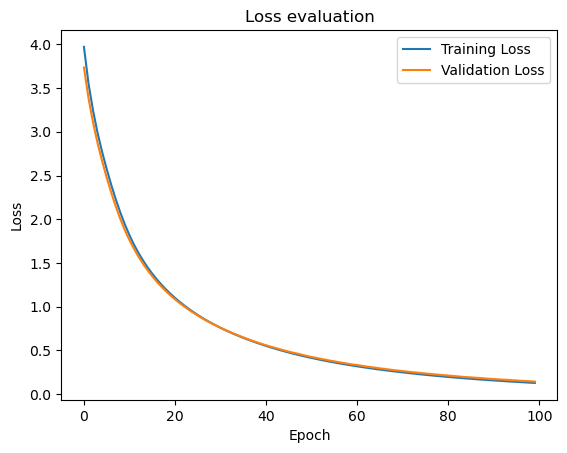

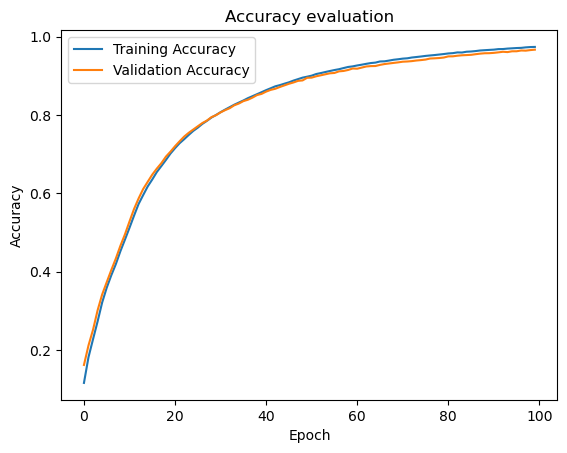

In [23]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
lossf = nn.CrossEntropyLoss()
best_vloss = 1_000_000.
epochs = 100
t_loss , t_acc = [], []
v_loss, v_acc = [], []

for epoch in range(epochs):
    train_correct, train_total = 0, 0
    print(f"EPOCH {epoch + 1}/{epochs}")
    model.train()  
    epoch_loss = 0.0

    for data, label in train_loader_fruits:
        data = data.float().to(Device)
        label = label.long().to(Device)

        outputs = model(data)
        loss = lossf(outputs, label)
        
        _, predicted = torch.max(outputs.data, 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_loss = epoch_loss / len(train_loader_fruits)
    train_accuracy = train_correct / train_total
    t_loss.append(train_loss)
    t_acc.append(train_accuracy)
    model.eval()  
    running_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for data, label in val_loader_fruits:
            data = data.float().to(Device)
            label = label.long().to(Device)

            outputs = model(data)
            loss = lossf(outputs, label)
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += label.size(0)
            val_correct += (predicted == label).sum().item()

            running_loss += loss.item()

    val_loss =  running_loss / len(val_loader_fruits)
    val_accuracy = val_correct / val_total
    v_loss.append(val_loss)
    v_acc.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_vloss:
        best_vloss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved Best Model")
    
plt.figure()
plt.plot(t_loss, label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.title('Loss evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_acc, label='Training Accuracy')
plt.plot(v_acc, label='Validation Accuracy')
plt.title('Accuracy evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import classification_report
model = MLP(input_size=34, num_classes=70).to(Device)
state_dict = torch.load("best_model.pth")
model.load_state_dict(state_dict)
model.eval()
y_true = []
y_pred = []
labelsforknown = label_encoder.classes_
with torch.no_grad():
    for test_data in test_loader_fruits:
        test_images, test_labels = (
            test_data[0].to(Device),
            test_data[1].long().to(Device),
        )
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
print(classification_report(y_true, y_pred, target_names=labelsforknown, digits=4))

/tmp/ipykernel_11352/3862851801.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("best_model.pth")


              precision    recall  f1-score   support

       Apple     0.8486    0.9145    0.8803      2525
     Apricot     0.7100    1.0000    0.8304       164
     Avocado     0.9283    0.9644    0.9460       309
      Banana     0.8160    0.6963    0.7514       484
    Beetroot     0.6809    0.4267    0.5246       150
   Blueberry     0.9619    0.6558    0.7799       154
     Cabbage     0.9583    0.9787    0.9684        47
      Cactus     0.5200    0.6265    0.5683       166
  Cantaloupe     0.9936    0.9421    0.9671       328
   Carambula     1.0000    0.4518    0.6224       166
      Carrot     1.0000    1.0000    1.0000        50
 Cauliflower     0.7879    1.0000    0.8814       234
      Cherry     0.8633    0.9077    0.8849      1148
    Chestnut     0.9231    0.5490    0.6885       153
  Clementine     0.9822    1.0000    0.9910       166
       Cocos     0.8079    0.7349    0.7697       166
        Corn     0.7231    0.4638    0.5651       304
    Cucumber     0.8246    

In [ ]:
from sklearn.metrics import classification_report
model.eval()
y_true = []
y_pred = []
labelsforknown = label_encoder.classes_
with torch.no_grad():
    for test_data in train_loader_fruits:
        test_images, test_labels = (
            test_data[0].to(Device),
            test_data[1].long().to(Device),
        )
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
print(classification_report(y_true, y_pred, target_names=labelsforknown, digits=4))

In [28]:
train_dataset_mnist = TensorDataset(torch.tensor(mnist_X_train), torch.tensor(mnist_y_train))
val_dataset_mnist = TensorDataset(torch.tensor(mnist_X_test), torch.tensor(mnist_y_test))
test_dataset_mnist = TensorDataset(torch.tensor(mnist_results_test), torch.tensor(mnist_y_test_tensor))

train_loader_mnist = DataLoader(train_dataset_mnist, batch_size=64, shuffle=True)
val_loader_mnist = DataLoader(val_dataset_mnist, batch_size=64, shuffle=True)
test_loader_mnist = DataLoader(test_dataset_mnist, batch_size=64, shuffle=True)

In [29]:
import torch

use_cuda = torch.cuda.is_available()
Device = "cuda"
model = MLP(input_size=34, num_classes=10).to(Device)

EPOCH 1/100
Train Loss: 2.2163, Validation Loss: 2.1464
Saved Best Model
EPOCH 2/100
Train Loss: 2.0296, Validation Loss: 1.8914
Saved Best Model
EPOCH 3/100
Train Loss: 1.7173, Validation Loss: 1.5404
Saved Best Model
EPOCH 4/100
Train Loss: 1.3723, Validation Loss: 1.2216
Saved Best Model
EPOCH 5/100
Train Loss: 1.1007, Validation Loss: 0.9983
Saved Best Model
EPOCH 6/100
Train Loss: 0.9205, Validation Loss: 0.8560
Saved Best Model
EPOCH 7/100
Train Loss: 0.8059, Validation Loss: 0.7665
Saved Best Model
EPOCH 8/100
Train Loss: 0.7314, Validation Loss: 0.7040
Saved Best Model
EPOCH 9/100
Train Loss: 0.6800, Validation Loss: 0.6630
Saved Best Model
EPOCH 10/100
Train Loss: 0.6440, Validation Loss: 0.6315
Saved Best Model
EPOCH 11/100
Train Loss: 0.6172, Validation Loss: 0.6121
Saved Best Model
EPOCH 12/100
Train Loss: 0.5969, Validation Loss: 0.5922
Saved Best Model
EPOCH 13/100
Train Loss: 0.5803, Validation Loss: 0.5782
Saved Best Model
EPOCH 14/100
Train Loss: 0.5671, Validation Los

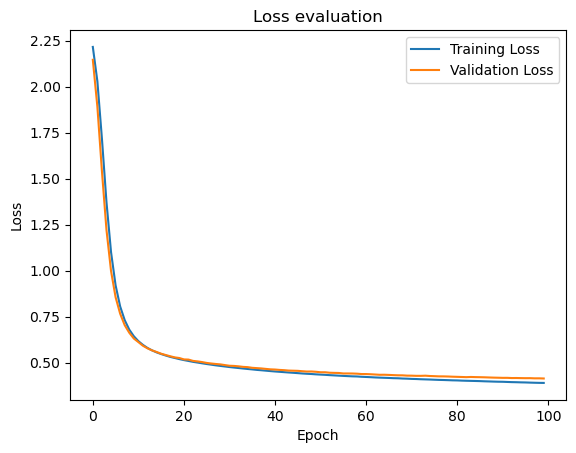

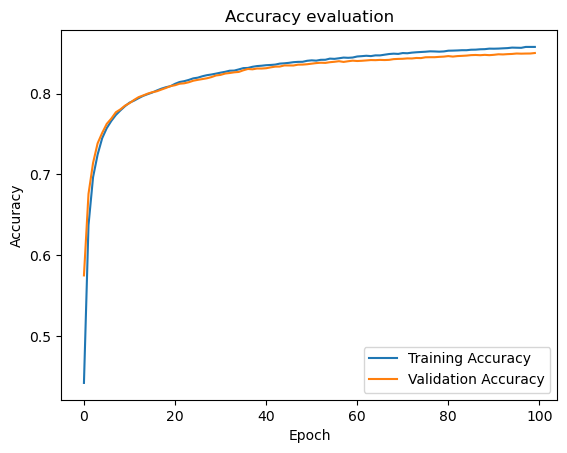

In [31]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
lossf = nn.CrossEntropyLoss()
best_vloss = 1_000_000.
epochs = 100
t_loss , t_acc = [], []
v_loss, v_acc = [], []

for epoch in range(epochs):
    train_correct, train_total = 0, 0
    print(f"EPOCH {epoch + 1}/{epochs}")
    model.train() 
    epoch_loss = 0.0

    for data, label in train_loader_mnist:
        data = data.float().to(Device)
        label = label.long().to(Device)

        outputs = model(data)
        loss = lossf(outputs, label)
        
        _, predicted = torch.max(outputs.data, 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_loss = epoch_loss / len(train_loader_mnist)
    train_accuracy = train_correct / train_total
    t_loss.append(train_loss)
    t_acc.append(train_accuracy)
    model.eval()
    running_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for data, label in val_loader_mnist:
            data = data.float().to(Device)
            label = label.long().to(Device)

            outputs = model(data)
            loss = lossf(outputs, label)
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += label.size(0)
            val_correct += (predicted == label).sum().item()

            running_loss += loss.item()

    val_loss =  running_loss / len(val_loader_mnist)
    val_accuracy = val_correct / val_total
    v_loss.append(val_loss)
    v_acc.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_vloss:
        best_vloss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved Best Model")
    
plt.figure()
plt.plot(t_loss, label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.title('Loss evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_acc, label='Training Accuracy')
plt.plot(v_acc, label='Validation Accuracy')
plt.title('Accuracy evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import classification_report
model.eval()
y_true = []
y_pred = []
labelsforknown = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

with torch.no_grad():
    for test_data in test_loader_mnist:
        test_images, test_labels = (
            test_data[0].to(Device),
            test_data[1].long().to(Device),
        )
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
print(classification_report(y_true, y_pred, target_names=labelsforknown, digits=4))

              precision    recall  f1-score   support

 T-shirt/top     0.7981    0.8260    0.8118      1000
     Trouser     0.9700    0.9690    0.9695      1000
    Pullover     0.7884    0.7600    0.7739      1000
       Dress     0.8566    0.8900    0.8730      1000
        Coat     0.7868    0.8120    0.7992      1000
      Sandal     0.9286    0.8980    0.9131      1000
       Shirt     0.6656    0.6150    0.6393      1000
     Sneaker     0.8812    0.8900    0.8856      1000
         Bag     0.9582    0.9630    0.9606      1000
  Ankle boot     0.9063    0.9290    0.9175      1000

    accuracy                         0.8552     10000
   macro avg     0.8540    0.8552    0.8543     10000
weighted avg     0.8540    0.8552    0.8543     10000



MLP direct peste imagini

In [4]:
import os
import cv2
import numpy as np

path_fruits_train = path_fruits + "Training"
path_fruits_test = path_fruits + "Test"

number_train = {}
number_test = {}

images_fruits_train = []
images_fruits_test = []
labels_fruits_train = []
labels_fruits_test = []

def process_images(path, images_list, labels_list, number_dict, image_size):
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            if (folder_name.split(" "))[0] not in number_dict:
                number_dict[(folder_name.split(" "))[0]] = 0
            number_dict[(folder_name.split(" "))[0]] += len(files)
            for file in files:
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path, cv2.IMREAD_COLOR)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                    images_list.append(img)
                    labels_list.append((folder_name.split(" "))[0])

process_images(path_fruits_train, images_fruits_train, labels_fruits_train, number_train, (20, 20))

process_images(path_fruits_test, images_fruits_test, labels_fruits_test, number_test, (20, 20))

images_fruits_train = np.array(images_fruits_train)
labels_fruits_train = np.array(labels_fruits_train)
images_fruits_test = np.array(images_fruits_test)
labels_fruits_test = np.array(labels_fruits_test)

images_fruits_train = scaler.fit_transform([i.flatten() for i in images_fruits_train])
images_fruits_test = scaler.fit_transform([i.flatten() for i in images_fruits_test])

print(f"Numărul de imagini pentru antrenare: {len(images_fruits_train)}")
print(f"Numărul de imagini pentru test: {len(images_fruits_test)}")

Numărul de imagini pentru antrenare: 70491
Numărul de imagini pentru test: 23619


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fruits_y_train_numeric = label_encoder.fit_transform(labels_fruits_train)
fruits_y_test_numeric = label_encoder.transform(labels_fruits_test)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fruits_X_train, fruits_X_test, fruits_y_train, fruits_y_test = train_test_split(images_fruits_train, fruits_y_train_numeric, test_size=0.35, random_state=42, shuffle=True)

In [7]:
import pandas as pd

path_mnist_train = path_mnist + "/fashion-mnist_train.csv"
real_df_mnist_train = pd.read_csv(path_mnist_train)

path_mnist_test = path_mnist + "/fashion-mnist_test.csv"
real_df_mnist_test = pd.read_csv(path_mnist_test)

label_train = real_df_mnist_train["label"]
label_test = real_df_mnist_test["label"]

df_mnist_train = real_df_mnist_train.drop(columns=["label"])
df_mnist_test = real_df_mnist_test.drop(columns=["label"])

mnist_train = []
mnist_test = []

for i in range(len(df_mnist_train)):
    mnist_train.append(df_mnist_train.iloc[i].values)

for i in range(len(df_mnist_test)):
    mnist_test.append(df_mnist_test.iloc[i].values)
    
import numpy as np

mnist_train = np.array(mnist_train)
mnist_test = np.array(mnist_test)
mnist_train = scaler.fit_transform([i.flatten() for i in mnist_train])
mnist_test = scaler.fit_transform([i.flatten() for i in mnist_test])

/home/melidia/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
from torch.utils.data import DataLoader, TensorDataset
import torch

train_dataset_fruits = TensorDataset(torch.tensor(fruits_X_train), torch.tensor(fruits_y_train))
val_dataset_fruits = TensorDataset(torch.tensor(fruits_X_test), torch.tensor(fruits_y_test))
test_dataset_fruits = TensorDataset(torch.tensor(images_fruits_test), torch.tensor(fruits_y_test_numeric))

train_loader_fruits = DataLoader(train_dataset_fruits, batch_size=64, shuffle=True)
val_loader_fruits = DataLoader(val_dataset_fruits, batch_size=64, shuffle=True)
test_loader_fruits = DataLoader(test_dataset_fruits, batch_size=64, shuffle=True)

In [9]:
mnist_y_train_tensor = label_train.to_numpy()
mnist_y_test_tensor = label_test.to_numpy()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_train, mnist_y_train_tensor, test_size=0.35, random_state=42, shuffle=True)

In [11]:
train_dataset_mnist = TensorDataset(torch.tensor(mnist_X_train), torch.tensor(mnist_y_train))
val_dataset_mnist = TensorDataset(torch.tensor(mnist_X_test), torch.tensor(mnist_y_test))
test_dataset_mnist = TensorDataset(torch.tensor(mnist_test), torch.tensor(mnist_y_test_tensor))

train_loader_mnist = DataLoader(train_dataset_mnist, batch_size=64, shuffle=True)
val_loader_mnist = DataLoader(test_dataset_mnist, batch_size=64, shuffle=True)
test_loader_mnist = DataLoader(test_dataset_mnist, batch_size=64, shuffle=True)

In [12]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size=1200, num_classes=64):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc5 = nn.Linear(128, num_classes) 
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc5(x)
        return x

    def name(self):
        return "MLP"

In [13]:
import torch

use_cuda = torch.cuda.is_available()
Device = "cuda"
model = MLP(input_size=1200, num_classes=70).to(Device)

EPOCH 1/66
Train Loss: 3.6806, Validation Loss: 3.2207
Saved Best Model
EPOCH 2/66
Train Loss: 2.9247, Validation Loss: 2.6704
Saved Best Model
EPOCH 3/66
Train Loss: 2.4769, Validation Loss: 2.3001
Saved Best Model
EPOCH 4/66
Train Loss: 2.1502, Validation Loss: 2.0130
Saved Best Model
EPOCH 5/66
Train Loss: 1.8886, Validation Loss: 1.7781
Saved Best Model
EPOCH 6/66
Train Loss: 1.6728, Validation Loss: 1.5838
Saved Best Model
EPOCH 7/66
Train Loss: 1.4931, Validation Loss: 1.4195
Saved Best Model
EPOCH 8/66
Train Loss: 1.3417, Validation Loss: 1.2807
Saved Best Model
EPOCH 9/66
Train Loss: 1.2128, Validation Loss: 1.1619
Saved Best Model
EPOCH 10/66
Train Loss: 1.1022, Validation Loss: 1.0589
Saved Best Model
EPOCH 11/66
Train Loss: 1.0064, Validation Loss: 0.9697
Saved Best Model
EPOCH 12/66
Train Loss: 0.9226, Validation Loss: 0.8907
Saved Best Model
EPOCH 13/66
Train Loss: 0.8487, Validation Loss: 0.8211
Saved Best Model
EPOCH 14/66
Train Loss: 0.7831, Validation Loss: 0.7588
Save

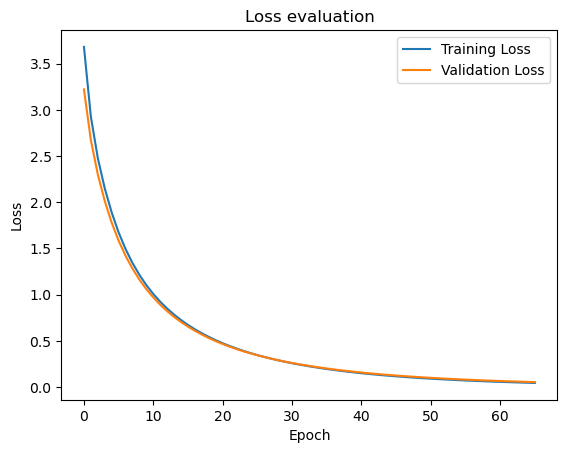

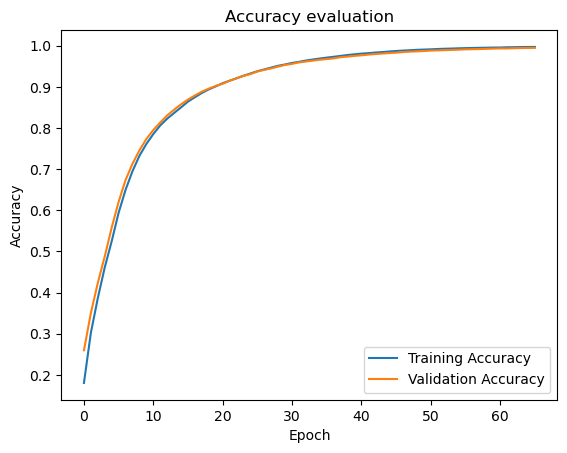

In [14]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
lossf = nn.CrossEntropyLoss()
best_vloss = 1_000_000.
epochs = 66
t_loss , t_acc = [], []
v_loss, v_acc = [], []

for epoch in range(epochs):
    train_correct, train_total = 0, 0
    print(f"EPOCH {epoch + 1}/{epochs}")
    model.train()  
    epoch_loss = 0.0

    for data, label in train_loader_fruits:
        data = data.float().to(Device)
        label = label.long().to(Device)

        outputs = model(data)
        loss = lossf(outputs, label)
        
        _, predicted = torch.max(outputs.data, 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_loss = epoch_loss / len(train_loader_fruits)
    train_accuracy = train_correct / train_total
    t_loss.append(train_loss)
    t_acc.append(train_accuracy)
    model.eval()  
    running_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for data, label in val_loader_fruits:
            data = data.float().to(Device)
            label = label.long().to(Device)

            outputs = model(data)
            loss = lossf(outputs, label)
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += label.size(0)
            val_correct += (predicted == label).sum().item()

            running_loss += loss.item()

    val_loss =  running_loss / len(val_loader_fruits)
    val_accuracy = val_correct / val_total
    v_loss.append(val_loss)
    v_acc.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_vloss:
        best_vloss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved Best Model")
    
plt.figure()
plt.plot(t_loss, label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.title('Loss evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_acc, label='Training Accuracy')
plt.plot(v_acc, label='Validation Accuracy')
plt.title('Accuracy evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import classification_report
model = MLP(input_size=1200, num_classes=70).to(Device)
state_dict = torch.load("best_model.pth")
model.load_state_dict(state_dict)
model.eval()
y_true = []
y_pred = []
labelsforknown = label_encoder.classes_
with torch.no_grad():
    for test_data in test_loader_fruits:
        test_images, test_labels = (
            test_data[0].to(Device),
            test_data[1].long().to(Device),
        )
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
print(classification_report(y_true, y_pred, target_names=labelsforknown, digits=4))

/tmp/ipykernel_6758/1440426569.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("best_model.pth")


              precision    recall  f1-score   support

       Apple     0.8556    0.9125    0.8831      2525
     Apricot     0.9318    1.0000    0.9647       164
     Avocado     0.9457    0.9579    0.9518       309
      Banana     0.7927    0.7190    0.7541       484
    Beetroot     0.6917    0.5533    0.6148       150
   Blueberry     0.9905    0.6753    0.8031       154
     Cabbage     1.0000    1.0000    1.0000        47
      Cactus     0.6711    0.6145    0.6415       166
  Cantaloupe     0.9704    1.0000    0.9850       328
   Carambula     1.0000    0.7229    0.8392       166
      Carrot     0.7353    1.0000    0.8475        50
 Cauliflower     0.8140    0.9915    0.8940       234
      Cherry     0.8302    0.8902    0.8592      1148
    Chestnut     0.9115    0.6732    0.7744       153
  Clementine     0.8783    1.0000    0.9352       166
       Cocos     0.9720    0.8373    0.8997       166
        Corn     0.7914    0.4868    0.6029       304
    Cucumber     0.8839    

In [16]:
import torch

use_cuda = torch.cuda.is_available()
Device = "cuda"
model = MLP(input_size=784, num_classes=10).to(Device)

EPOCH 1/66
Train Loss: 1.6784, Validation Loss: 1.2296
Saved Best Model
EPOCH 2/66
Train Loss: 1.0329, Validation Loss: 0.8974
Saved Best Model
EPOCH 3/66
Train Loss: 0.8155, Validation Loss: 0.7555
Saved Best Model
EPOCH 4/66
Train Loss: 0.7067, Validation Loss: 0.6765
Saved Best Model
EPOCH 5/66
Train Loss: 0.6419, Validation Loss: 0.6236
Saved Best Model
EPOCH 6/66
Train Loss: 0.5976, Validation Loss: 0.5852
Saved Best Model
EPOCH 7/66
Train Loss: 0.5652, Validation Loss: 0.5568
Saved Best Model
EPOCH 8/66
Train Loss: 0.5395, Validation Loss: 0.5345
Saved Best Model
EPOCH 9/66
Train Loss: 0.5192, Validation Loss: 0.5163
Saved Best Model
EPOCH 10/66
Train Loss: 0.5021, Validation Loss: 0.5028
Saved Best Model
EPOCH 11/66
Train Loss: 0.4880, Validation Loss: 0.4878
Saved Best Model
EPOCH 12/66
Train Loss: 0.4759, Validation Loss: 0.4768
Saved Best Model
EPOCH 13/66
Train Loss: 0.4657, Validation Loss: 0.4683
Saved Best Model
EPOCH 14/66
Train Loss: 0.4566, Validation Loss: 0.4596
Save

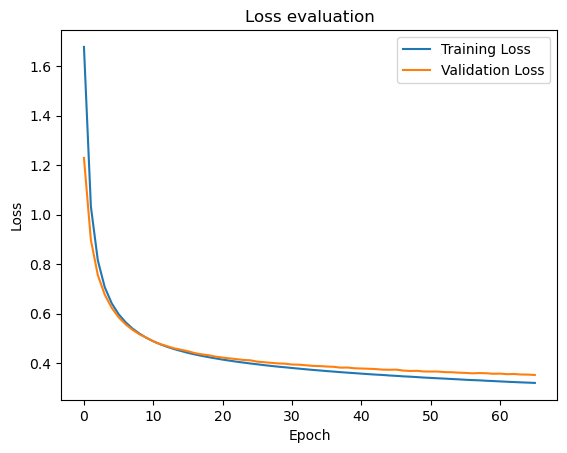

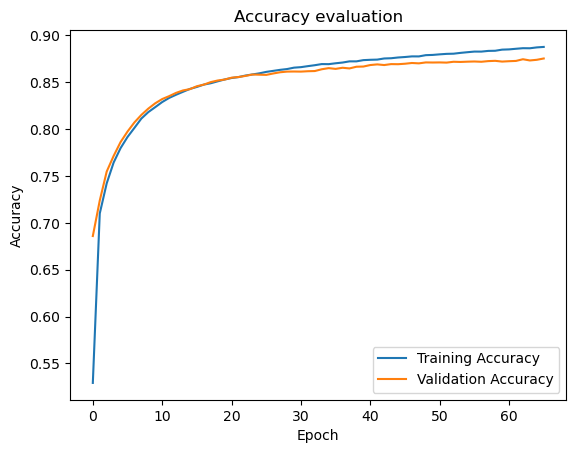

In [17]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
lossf = nn.CrossEntropyLoss()
best_vloss = 1_000_000.
epochs = 66
t_loss , t_acc = [], []
v_loss, v_acc = [], []

for epoch in range(epochs):
    train_correct, train_total = 0, 0
    print(f"EPOCH {epoch + 1}/{epochs}")
    model.train()  
    epoch_loss = 0.0

    for data, label in train_loader_mnist:
        data = data.float().to(Device)
        label = label.long().to(Device)

        outputs = model(data)
        loss = lossf(outputs, label)
        
        _, predicted = torch.max(outputs.data, 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_loss = epoch_loss / len(train_loader_mnist)
    train_accuracy = train_correct / train_total
    t_loss.append(train_loss)
    t_acc.append(train_accuracy)
    model.eval()
    running_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for data, label in val_loader_mnist:
            data = data.float().to(Device)
            label = label.long().to(Device)

            outputs = model(data)
            loss = lossf(outputs, label)
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += label.size(0)
            val_correct += (predicted == label).sum().item()

            running_loss += loss.item()

    val_loss =  running_loss / len(val_loader_mnist)
    val_accuracy = val_correct / val_total
    v_loss.append(val_loss)
    v_acc.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_vloss:
        best_vloss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved Best Model")
    
plt.figure()
plt.plot(t_loss, label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.title('Loss evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_acc, label='Training Accuracy')
plt.plot(v_acc, label='Validation Accuracy')
plt.title('Accuracy evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import classification_report
model = MLP(input_size=784, num_classes=10).to(Device)
state_dict = torch.load("best_model.pth")
model.load_state_dict(state_dict)
model.eval()
y_true = []
y_pred = []
labelsforknown = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
with torch.no_grad():
    for test_data in test_loader_mnist:
        test_images, test_labels = (
            test_data[0].to(Device),
            test_data[1].long().to(Device),
        )
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
print(classification_report(y_true, y_pred, target_names=labelsforknown, digits=4))

/tmp/ipykernel_6758/3931322749.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("best_model.pth")


              precision    recall  f1-score   support

 T-shirt/top     0.8148    0.8360    0.8253      1000
     Trouser     0.9789    0.9760    0.9775      1000
    Pullover     0.8130    0.8000    0.8065      1000
       Dress     0.8787    0.8980    0.8882      1000
        Coat     0.8114    0.8430    0.8269      1000
      Sandal     0.9436    0.9210    0.9322      1000
       Shirt     0.7116    0.6540    0.6816      1000
     Sneaker     0.9055    0.9200    0.9127      1000
         Bag     0.9592    0.9640    0.9616      1000
  Ankle boot     0.9272    0.9420    0.9345      1000

    accuracy                         0.8754     10000
   macro avg     0.8744    0.8754    0.8747     10000
weighted avg     0.8744    0.8754    0.8747     10000



Deepconvnet peste imagini

In [3]:
import os
import cv2
import numpy as np

path_fruits_train = path_fruits + "Training"
path_fruits_test = path_fruits + "Test"

number_train = {}
number_test = {}

images_fruits_train = []
images_fruits_test = []
labels_fruits_train = []
labels_fruits_test = []

def process_images(path, images_list, labels_list, number_dict, image_size):
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            if (folder_name.split(" "))[0] not in number_dict:
                number_dict[(folder_name.split(" "))[0]] = 0
            number_dict[(folder_name.split(" "))[0]] += len(files)
            for file in files:
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path, cv2.IMREAD_COLOR)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                    images_list.append(img)
                    labels_list.append((folder_name.split(" "))[0])

process_images(path_fruits_train, images_fruits_train, labels_fruits_train, number_train, (20, 20))

process_images(path_fruits_test, images_fruits_test, labels_fruits_test, number_test, (20, 20))

images_fruits_train = np.array(images_fruits_train)
labels_fruits_train = np.array(labels_fruits_train)
images_fruits_test = np.array(images_fruits_test)
labels_fruits_test = np.array(labels_fruits_test)

print(f"Numărul de imagini pentru antrenare: {len(images_fruits_train)}")
print(f"Numărul de imagini pentru test: {len(images_fruits_test)}")

Numărul de imagini pentru antrenare: 70491
Numărul de imagini pentru test: 23619


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
from PIL import Image, ImageFilter
from torchvision import transforms

def open_image(path):
    image = Image.open(path)
    return image

transforms_img = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_img = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [6]:
import torch
import torch.nn as nn

class ConvBlock(nn.Module):
    def __init__(self, num_classes=70):
        super(ConvBlock, self).__init__()
        
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1), 
            nn.BatchNorm2d(16),                                   
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2)                                           
        )
        
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.backbone(x)
        x = self.global_pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = ConvBlock(num_classes=70)
use_cuda = torch.cuda.is_available()
Device = "cuda"
model = model.to(Device)
print(model)


ConvBlock(
  (backbone): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): AvgPool2d(kernel_size=3, stride=2, padding=0)
    (4): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): AvgPool2d(kernel_size=3, stride=2, padding=0)
    (8): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): AvgPool2d(kernel_size=3, stride=2, padding=0)
  )
  (global_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=70, bi

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fruits_y_train_numeric = label_encoder.fit_transform(labels_fruits_train)
fruits_y_test_numeric = label_encoder.transform(labels_fruits_test)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fruits_X_train, fruits_X_test, fruits_y_train, fruits_y_test = train_test_split(images_fruits_train, fruits_y_train_numeric, test_size=0.35, random_state=42, shuffle=True)

In [9]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, image_files, labels, transforms):
        self.image_files = image_files
        self.labels = labels
        self.transforms = transforms
    def __len__(self):
        return len(self.image_files)
    def __getitem__(self, index):
        return self.transforms(self.image_files[index]), self.labels[index]

In [10]:
from torch.utils.data import DataLoader, TensorDataset
import torch

train_dataset_fruits = Dataset(torch.tensor(fruits_X_train).float().permute(0, 3, 1, 2), torch.tensor(fruits_y_train), transforms_img)
val_dataset_fruits = Dataset(torch.tensor(fruits_X_test).float().permute(0, 3, 1, 2), torch.tensor(fruits_y_test), transforms_img)
test_dataset_fruits = Dataset(torch.tensor(images_fruits_test).float().permute(0, 3, 1, 2), torch.tensor(fruits_y_test_numeric), test_img)

train_loader_fruits = DataLoader(train_dataset_fruits, batch_size=64, shuffle=True)
val_loader_fruits = DataLoader(val_dataset_fruits, batch_size=64, shuffle=True)
test_loader_fruits = DataLoader(test_dataset_fruits, batch_size=64, shuffle=True)

EPOCH 1/35
Train Loss: 3.5968, Validation Loss: 3.1136
Saved Best Model
EPOCH 2/35
Train Loss: 2.8759, Validation Loss: 2.6298
Saved Best Model
EPOCH 3/35
Train Loss: 2.4869, Validation Loss: 2.2841
Saved Best Model
EPOCH 4/35
Train Loss: 2.1787, Validation Loss: 2.0067
Saved Best Model
EPOCH 5/35
Train Loss: 1.9155, Validation Loss: 1.7517
Saved Best Model
EPOCH 6/35
Train Loss: 1.6910, Validation Loss: 1.5215
Saved Best Model
EPOCH 7/35
Train Loss: 1.4969, Validation Loss: 1.3448
Saved Best Model
EPOCH 8/35
Train Loss: 1.3262, Validation Loss: 1.1974
Saved Best Model
EPOCH 9/35
Train Loss: 1.1800, Validation Loss: 1.0431
Saved Best Model
EPOCH 10/35
Train Loss: 1.0528, Validation Loss: 0.9226
Saved Best Model
EPOCH 11/35
Train Loss: 0.9401, Validation Loss: 0.8187
Saved Best Model
EPOCH 12/35
Train Loss: 0.8397, Validation Loss: 0.7252
Saved Best Model
EPOCH 13/35
Train Loss: 0.7536, Validation Loss: 0.6410
Saved Best Model
EPOCH 14/35
Train Loss: 0.6782, Validation Loss: 0.5738
Save

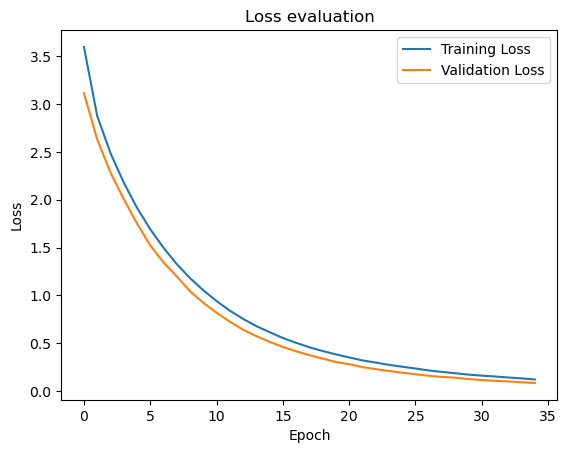

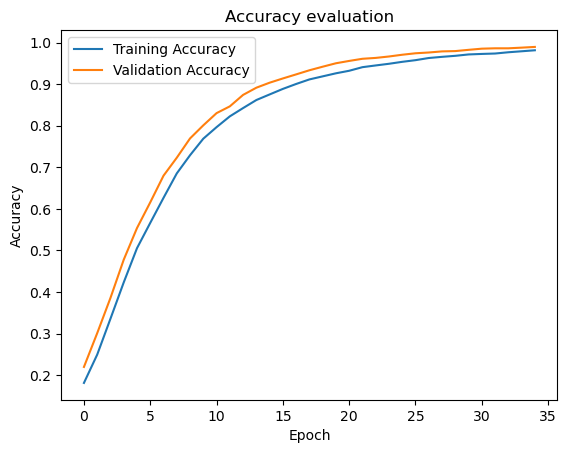

In [11]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
lossf = nn.CrossEntropyLoss()
best_vloss = 1_000_000.
epochs = 35
t_loss , t_acc = [], []
v_loss, v_acc = [], []

for epoch in range(epochs):
    train_correct, train_total = 0, 0
    print(f"EPOCH {epoch + 1}/{epochs}")
    model.train()  
    epoch_loss = 0.0

    for i, (data, label) in enumerate(train_loader_fruits):
        data = data.float().to(Device)
        label = label.long().to(Device)

        outputs = model(data)
        loss = lossf(outputs, label)
        
        _, predicted = torch.max(outputs.data, 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_loss = epoch_loss / len(train_loader_fruits)
    train_accuracy = train_correct / train_total
    t_loss.append(train_loss)
    t_acc.append(train_accuracy)
    model.eval()  
    running_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for i, (data, label) in enumerate(val_loader_fruits):
            data = data.float().to(Device)
            label = label.long().to(Device)

            outputs = model(data)
            loss = lossf(outputs, label)
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += label.size(0)
            val_correct += (predicted == label).sum().item()

            running_loss += loss.item()

    val_loss =  running_loss / len(val_loader_fruits)
    val_accuracy = val_correct / val_total
    v_loss.append(val_loss)
    v_acc.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_vloss:
        best_vloss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved Best Model")
    
plt.figure()
plt.plot(t_loss, label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.title('Loss evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_acc, label='Training Accuracy')
plt.plot(v_acc, label='Validation Accuracy')
plt.title('Accuracy evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import classification_report
model = ConvBlock(num_classes=70).to(Device)
state_dict = torch.load("best_model.pth")
model.load_state_dict(state_dict)
model.eval()
y_true = []
y_pred = []
labelsforknown = label_encoder.classes_
with torch.no_grad():
    for test_data in test_loader_fruits:
        test_images, test_labels = (
            test_data[0].to(Device),
            test_data[1].long().to(Device),
        )
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
print(classification_report(y_true, y_pred, target_names=labelsforknown, digits=4))

/tmp/ipykernel_25330/2423494927.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("best_model.pth")


              precision    recall  f1-score   support

       Apple     0.8927    0.9422    0.9168      2525
     Apricot     1.0000    1.0000    1.0000       164
     Avocado     0.9810    1.0000    0.9904       309
      Banana     1.0000    0.8864    0.9398       484
    Beetroot     0.9118    0.4133    0.5688       150
   Blueberry     0.8288    0.5974    0.6943       154
     Cabbage     1.0000    1.0000    1.0000        47
      Cactus     0.9651    1.0000    0.9822       166
  Cantaloupe     1.0000    1.0000    1.0000       328
   Carambula     0.9187    0.8855    0.9018       166
      Carrot     1.0000    1.0000    1.0000        50
 Cauliflower     0.9141    1.0000    0.9551       234
      Cherry     0.9846    1.0000    0.9922      1148
    Chestnut     0.7474    0.9281    0.8280       153
  Clementine     1.0000    1.0000    1.0000       166
       Cocos     0.9274    1.0000    0.9623       166
        Corn     0.9686    0.5066    0.6652       304
    Cucumber     1.0000    

In [7]:
import pandas as pd

path_mnist_train = path_mnist + "/fashion-mnist_train.csv"
real_df_mnist_train = pd.read_csv(path_mnist_train)

path_mnist_test = path_mnist + "/fashion-mnist_test.csv"
real_df_mnist_test = pd.read_csv(path_mnist_test)

label_train = real_df_mnist_train["label"]
label_test = real_df_mnist_test["label"]

df_mnist_train = real_df_mnist_train.drop(columns=["label"])
df_mnist_test = real_df_mnist_test.drop(columns=["label"])

mnist_train = []
mnist_test = []

for i in range(len(df_mnist_train)):
    mnist_train.append(df_mnist_train.iloc[i].values)

for i in range(len(df_mnist_test)):
    mnist_test.append(df_mnist_test.iloc[i].values)
    
import numpy as np

mnist_train = np.array(mnist_train)
mnist_test = np.array(mnist_test)
mnist_train = scaler.fit_transform([i.flatten() for i in mnist_train])
mnist_test = scaler.fit_transform([i.flatten() for i in mnist_test])

In [8]:
mnist_y_train_tensor = label_train.to_numpy()
mnist_y_test_tensor = label_test.to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_train, mnist_y_train_tensor, test_size=0.35, random_state=42, shuffle=True)

In [36]:
from PIL import Image, ImageFilter
from torchvision import transforms

def open_image(path):
    image = Image.open(path)
    return image

transforms_img = transforms.Compose([
    transforms.Normalize(mean=[0.485], std=[0.229])
])

test_img = transforms.Compose([
    transforms.Normalize(mean=[0.485], std=[0.229])
])

In [12]:
import torch
class Dataset(torch.utils.data.Dataset):
    def __init__(self, image_files, labels, transforms):
        self.image_files = image_files
        self.labels = labels
        self.transforms = transforms
    def __len__(self):
        return len(self.image_files)
    def __getitem__(self, index):
        return self.transforms(self.image_files[index]), self.labels[index]

In [37]:
from torch.utils.data import DataLoader
train_dataset_mnist = Dataset(torch.tensor(mnist_X_train).float().reshape(-1, 1, 28, 28), torch.tensor(mnist_y_train), transforms_img)
val_dataset_mnist = Dataset(torch.tensor(mnist_X_test).float().reshape(-1, 1, 28, 28), torch.tensor(mnist_y_test), transforms_img)
test_dataset_mnist = Dataset(torch.tensor(mnist_test).float().reshape(-1, 1, 28, 28), torch.tensor(mnist_y_test_tensor), transforms_img)

train_loader_mnist = DataLoader(train_dataset_mnist, batch_size=64, shuffle=True)
val_loader_mnist = DataLoader(test_dataset_mnist, batch_size=64, shuffle=True)
test_loader_mnist = DataLoader(test_dataset_mnist, batch_size=64, shuffle=True)

In [34]:
import torch
import torch.nn as nn

class ConvBlock(nn.Module):
    def __init__(self, num_classes=70):
        super(ConvBlock, self).__init__()
        
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1), 
            nn.BatchNorm2d(16),                                   
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2)                                           
        )
        
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.backbone(x)
        x = self.global_pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = ConvBlock(num_classes=10)
use_cuda = torch.cuda.is_available()
Device = "cuda"
model = model.to(Device)
print(model)


ConvBlock(
  (backbone): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): AvgPool2d(kernel_size=3, stride=2, padding=0)
    (4): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): AvgPool2d(kernel_size=3, stride=2, padding=0)
    (8): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): AvgPool2d(kernel_size=3, stride=2, padding=0)
  )
  (global_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bi

EPOCH 1/35
Train Loss: 1.7598, Validation Loss: 1.3651
Saved Best Model
EPOCH 2/35
Train Loss: 1.1811, Validation Loss: 1.0188
Saved Best Model
EPOCH 3/35
Train Loss: 0.9342, Validation Loss: 0.8413
Saved Best Model
EPOCH 4/35
Train Loss: 0.8060, Validation Loss: 0.7521
Saved Best Model
EPOCH 5/35
Train Loss: 0.7325, Validation Loss: 0.6950
Saved Best Model
EPOCH 6/35
Train Loss: 0.6845, Validation Loss: 0.6527
Saved Best Model
EPOCH 7/35
Train Loss: 0.6494, Validation Loss: 0.6204
Saved Best Model
EPOCH 8/35
Train Loss: 0.6225, Validation Loss: 0.5961
Saved Best Model
EPOCH 9/35
Train Loss: 0.6004, Validation Loss: 0.5786
Saved Best Model
EPOCH 10/35
Train Loss: 0.5809, Validation Loss: 0.5588
Saved Best Model
EPOCH 11/35
Train Loss: 0.5653, Validation Loss: 0.5451
Saved Best Model
EPOCH 12/35
Train Loss: 0.5502, Validation Loss: 0.5284
Saved Best Model
EPOCH 13/35
Train Loss: 0.5356, Validation Loss: 0.5170
Saved Best Model
EPOCH 14/35
Train Loss: 0.5241, Validation Loss: 0.5030
Save

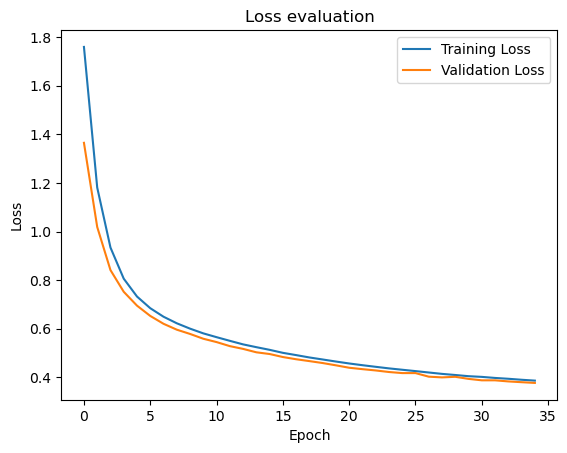

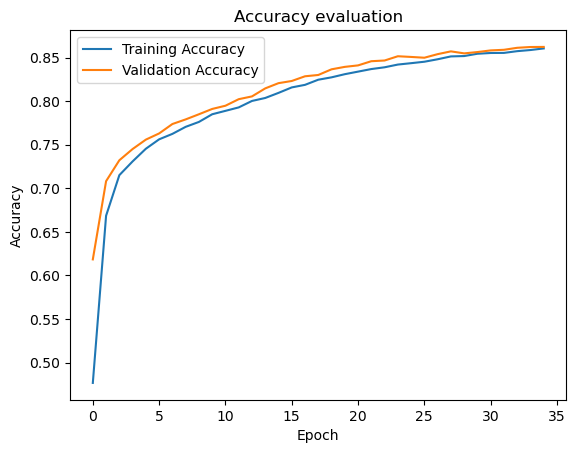

In [38]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
lossf = nn.CrossEntropyLoss()
best_vloss = 1_000_000.
epochs = 35
t_loss , t_acc = [], []
v_loss, v_acc = [], []

for epoch in range(epochs):
    train_correct, train_total = 0, 0
    print(f"EPOCH {epoch + 1}/{epochs}")
    model.train()  
    epoch_loss = 0.0

    for data, label in train_loader_mnist:
        
        data = data.float().to(Device)
        label = label.long().to(Device)

        
        outputs = model(data)
        loss = lossf(outputs, label)
        
        _, predicted = torch.max(outputs.data, 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_loss = epoch_loss / len(train_loader_mnist)
    train_accuracy = train_correct / train_total
    t_loss.append(train_loss)
    t_acc.append(train_accuracy)
    model.eval()  
    running_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for data, label in val_loader_mnist:
            data = data.float().to(Device)
            label = label.long().to(Device)

            outputs = model(data)
            loss = lossf(outputs, label)
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += label.size(0)
            val_correct += (predicted == label).sum().item()

            running_loss += loss.item()

    val_loss =  running_loss / len(val_loader_mnist)
    val_accuracy = val_correct / val_total
    v_loss.append(val_loss)
    v_acc.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_vloss:
        best_vloss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved Best Model")
    
plt.figure()
plt.plot(t_loss, label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.title('Loss evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_acc, label='Training Accuracy')
plt.plot(v_acc, label='Validation Accuracy')
plt.title('Accuracy evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [39]:
from sklearn.metrics import classification_report
model = model = ConvBlock(num_classes=10).to(Device)
state_dict = torch.load("best_model.pth")
model.load_state_dict(state_dict)
model.eval()
y_true = []
y_pred = []
labelsforknown = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
with torch.no_grad():
    for test_data in test_loader_mnist:
        test_images, test_labels = (
            test_data[0].to(Device),
            test_data[1].long().to(Device),
        )
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
print(classification_report(y_true, y_pred, target_names=labelsforknown, digits=4))

/tmp/ipykernel_28751/3098396568.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("best_model.pth")


              precision    recall  f1-score   support

 T-shirt/top     0.8158    0.8150    0.8154      1000
     Trouser     0.9898    0.9660    0.9777      1000
    Pullover     0.8328    0.7570    0.7931      1000
       Dress     0.8632    0.9020    0.8822      1000
        Coat     0.7375    0.8570    0.7928      1000
      Sandal     0.9571    0.9370    0.9469      1000
       Shirt     0.6506    0.5790    0.6127      1000
     Sneaker     0.9144    0.8870    0.9005      1000
         Bag     0.9576    0.9700    0.9637      1000
  Ankle boot     0.9016    0.9530    0.9266      1000

    accuracy                         0.8623     10000
   macro avg     0.8620    0.8623    0.8612     10000
weighted avg     0.8620    0.8623    0.8612     10000



RESNET-18

In [1]:
path_fruits = "/home/melidia/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/"

In [18]:
import torchvision.models as models
import torch
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 70)

/home/melidia/.local/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/melidia/.local/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
import torch

use_cuda = torch.cuda.is_available()
Device = "cuda"
model = model.to(Device)

In [4]:
import os
import cv2
import numpy as np

path_fruits_train = path_fruits + "Training"
path_fruits_test = path_fruits + "Test"

number_train = {}
number_test = {}

images_fruits_train = []
images_fruits_test = []
labels_fruits_train = []
labels_fruits_test = []

def process_images(path, images_list, labels_list, number_dict, image_size):
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            if (folder_name.split(" "))[0] not in number_dict:
                number_dict[(folder_name.split(" "))[0]] = 0
            number_dict[(folder_name.split(" "))[0]] += len(files)
            for file in files:
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path, cv2.IMREAD_COLOR)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                    images_list.append(img)
                    labels_list.append((folder_name.split(" "))[0])

process_images(path_fruits_train, images_fruits_train, labels_fruits_train, number_train, (32, 32))

process_images(path_fruits_test, images_fruits_test, labels_fruits_test, number_test, (32, 32))

images_fruits_train = np.array(images_fruits_train)
labels_fruits_train = np.array(labels_fruits_train)
images_fruits_test = np.array(images_fruits_test)
labels_fruits_test = np.array(labels_fruits_test)

print(f"Numărul de imagini pentru antrenare: {len(images_fruits_train)}")
print(f"Numărul de imagini pentru test: {len(images_fruits_test)}")

Numărul de imagini pentru antrenare: 70491
Numărul de imagini pentru test: 23619


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
from PIL import Image, ImageFilter
from torchvision import transforms

def open_image(path):
    image = Image.open(path)
    return image

transforms_img = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_img = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fruits_y_train_numeric = label_encoder.fit_transform(labels_fruits_train)
fruits_y_test_numeric = label_encoder.transform(labels_fruits_test)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fruits_X_train, fruits_X_test, fruits_y_train, fruits_y_test = train_test_split(images_fruits_train, fruits_y_train_numeric, test_size=0.35, random_state=42, shuffle=True)

In [10]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, image_files, labels, transforms):
        self.image_files = image_files
        self.labels = labels
        self.transforms = transforms
    def __len__(self):
        return len(self.image_files)
    def __getitem__(self, index):
        return self.transforms(self.image_files[index]), self.labels[index]

In [11]:
from torch.utils.data import DataLoader, TensorDataset
import torch

train_dataset_fruits = Dataset(torch.tensor(fruits_X_train).float().permute(0, 3, 1, 2), torch.tensor(fruits_y_train), transforms_img)
val_dataset_fruits = Dataset(torch.tensor(fruits_X_test).float().permute(0, 3, 1, 2), torch.tensor(fruits_y_test), transforms_img)
test_dataset_fruits = Dataset(torch.tensor(images_fruits_test).float().permute(0, 3, 1, 2), torch.tensor(fruits_y_test_numeric), test_img)

train_loader_fruits = DataLoader(train_dataset_fruits, batch_size=64, shuffle=True)
val_loader_fruits = DataLoader(val_dataset_fruits, batch_size=64, shuffle=True)
test_loader_fruits = DataLoader(test_dataset_fruits, batch_size=64, shuffle=True)

EPOCH 1/25
Train Loss: 3.7014, Validation Loss: 2.9886
Saved Best Model
EPOCH 2/25
Train Loss: 2.7353, Validation Loss: 2.3164
Saved Best Model
EPOCH 3/25
Train Loss: 2.2069, Validation Loss: 1.8489
Saved Best Model
EPOCH 4/25
Train Loss: 1.8171, Validation Loss: 1.4927
Saved Best Model
EPOCH 5/25
Train Loss: 1.5174, Validation Loss: 1.2247
Saved Best Model
EPOCH 6/25
Train Loss: 1.2806, Validation Loss: 0.9905
Saved Best Model
EPOCH 7/25
Train Loss: 1.0972, Validation Loss: 0.8364
Saved Best Model
EPOCH 8/25
Train Loss: 0.9453, Validation Loss: 0.6981
Saved Best Model
EPOCH 9/25
Train Loss: 0.8138, Validation Loss: 0.5923
Saved Best Model
EPOCH 10/25
Train Loss: 0.7035, Validation Loss: 0.5033
Saved Best Model
EPOCH 11/25
Train Loss: 0.6214, Validation Loss: 0.4264
Saved Best Model
EPOCH 12/25
Train Loss: 0.5458, Validation Loss: 0.3609
Saved Best Model
EPOCH 13/25
Train Loss: 0.4856, Validation Loss: 0.3117
Saved Best Model
EPOCH 14/25
Train Loss: 0.4379, Validation Loss: 0.2772
Save

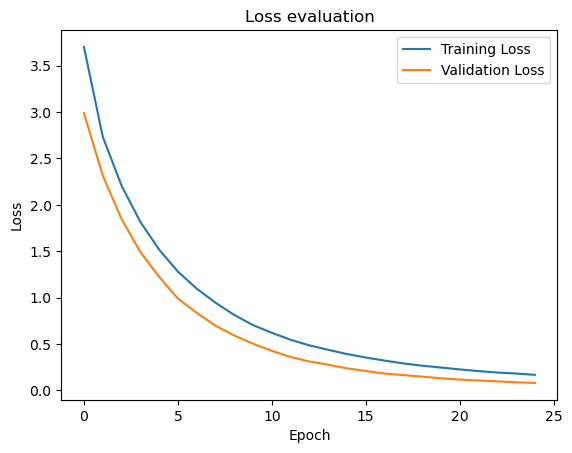

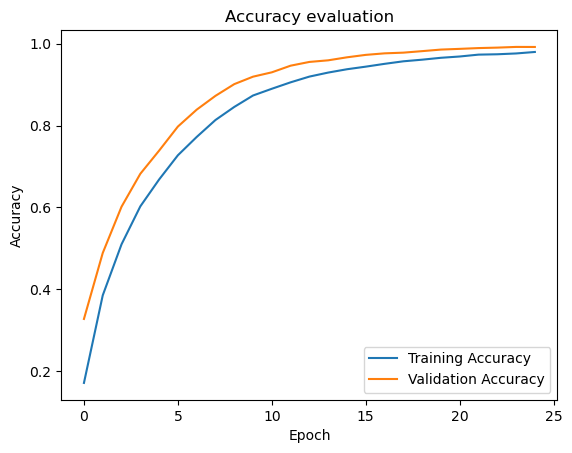

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
lossf = torch.nn.CrossEntropyLoss()
best_vloss = 1_000_000.
epochs = 25
t_loss , t_acc = [], []
v_loss, v_acc = [], []

for epoch in range(epochs):
    train_correct, train_total = 0, 0
    print(f"EPOCH {epoch + 1}/{epochs}")
    model.train()  
    epoch_loss = 0.0

    for i, (data, label) in enumerate(train_loader_fruits):
        data = data.float().to(Device)
        label = label.long().to(Device)

        outputs = model(data)
        loss = lossf(outputs, label)
        
        _, predicted = torch.max(outputs.data, 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_loss = epoch_loss / len(train_loader_fruits)
    train_accuracy = train_correct / train_total
    t_loss.append(train_loss)
    t_acc.append(train_accuracy)
    model.eval()  
    running_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for i, (data, label) in enumerate(val_loader_fruits):
            data = data.float().to(Device)
            label = label.long().to(Device)

            outputs = model(data)
            loss = lossf(outputs, label)
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += label.size(0)
            val_correct += (predicted == label).sum().item()

            running_loss += loss.item()

    val_loss =  running_loss / len(val_loader_fruits)
    val_accuracy = val_correct / val_total
    v_loss.append(val_loss)
    v_acc.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_vloss:
        best_vloss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved Best Model")
    
plt.figure()
plt.plot(t_loss, label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.title('Loss evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_acc, label='Training Accuracy')
plt.plot(v_acc, label='Validation Accuracy')
plt.title('Accuracy evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import classification_report
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 70)
model = model.to(Device)
state_dict = torch.load("best_model.pth")
model.load_state_dict(state_dict)
model.eval()
y_true = []
y_pred = []
labelsforknown = label_encoder.classes_
with torch.no_grad():
    for test_data in test_loader_fruits:
        test_images, test_labels = (
            test_data[0].to(Device),
            test_data[1].long().to(Device),
        )
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
print(classification_report(y_true, y_pred, target_names=labelsforknown, digits=4))

/tmp/ipykernel_887/2455007551.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("best_model.pth")


              precision    recall  f1-score   support

       Apple     0.8218    0.9568    0.8842      2525
     Apricot     1.0000    1.0000    1.0000       164
     Avocado     0.9508    1.0000    0.9748       309
      Banana     0.9774    0.8037    0.8821       484
    Beetroot     0.8025    0.4333    0.5628       150
   Blueberry     0.9742    0.9805    0.9773       154
     Cabbage     0.9216    1.0000    0.9592        47
      Cactus     0.9254    0.7470    0.8267       166
  Cantaloupe     0.8790    0.9970    0.9343       328
   Carambula     0.9623    0.9217    0.9415       166
      Carrot     0.8929    1.0000    0.9434        50
 Cauliflower     0.9398    1.0000    0.9689       234
      Cherry     0.9413    0.9503    0.9458      1148
    Chestnut     0.9836    0.7843    0.8727       153
  Clementine     0.9820    0.9880    0.9850       166
       Cocos     0.9742    0.9096    0.9408       166
        Corn     0.8864    0.5132    0.6500       304
    Cucumber     0.9231    

In [1]:
path_mnist = "/home/melidia/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4"

In [23]:
import torchvision.models as models
import torch
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 10)
use_cuda = torch.cuda.is_available()
Device = "cuda"
model = model.to(Device)

/home/melidia/.local/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/melidia/.local/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
import pandas as pd

path_mnist_train = path_mnist + "/fashion-mnist_train.csv"
real_df_mnist_train = pd.read_csv(path_mnist_train)

path_mnist_test = path_mnist + "/fashion-mnist_test.csv"
real_df_mnist_test = pd.read_csv(path_mnist_test)

label_train = real_df_mnist_train["label"]
label_test = real_df_mnist_test["label"]

df_mnist_train = real_df_mnist_train.drop(columns=["label"])
df_mnist_test = real_df_mnist_test.drop(columns=["label"])

mnist_train = []
mnist_test = []

for i in range(len(df_mnist_train)):
    mnist_train.append(df_mnist_train.iloc[i].values)

for i in range(len(df_mnist_test)):
    mnist_test.append(df_mnist_test.iloc[i].values)
    
import numpy as np

mnist_train = np.array(mnist_train)
mnist_test = np.array(mnist_test)
mnist_train = scaler.fit_transform([i.flatten() for i in mnist_train])
mnist_test = scaler.fit_transform([i.flatten() for i in mnist_test])

In [6]:
mnist_y_train_tensor = label_train.to_numpy()
mnist_y_test_tensor = label_test.to_numpy()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_train, mnist_y_train_tensor, test_size=0.35, random_state=42, shuffle=True)

In [13]:
from PIL import Image, ImageFilter
from torchvision import transforms

def open_image(path):
    image = Image.open(path)
    return image

def duplicate_channel(image):
    return image.repeat(3, 1, 1)   

transforms_img = transforms.Compose([
    duplicate_channel,
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_img = transforms.Compose([
    duplicate_channel,
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [9]:
import torch
class Dataset(torch.utils.data.Dataset):
    def __init__(self, image_files, labels, transforms):
        self.image_files = image_files
        self.labels = labels
        self.transforms = transforms
    def __len__(self):
        return len(self.image_files)
    def __getitem__(self, index):
        return self.transforms(self.image_files[index]), self.labels[index]

In [14]:
from torch.utils.data import DataLoader
train_dataset_mnist = Dataset(torch.tensor(mnist_X_train).float().reshape(-1, 1, 28, 28), torch.tensor(mnist_y_train), transforms_img)
val_dataset_mnist = Dataset(torch.tensor(mnist_X_test).float().reshape(-1, 1, 28, 28), torch.tensor(mnist_y_test), transforms_img)
test_dataset_mnist = Dataset(torch.tensor(mnist_test).float().reshape(-1, 1, 28, 28), torch.tensor(mnist_y_test_tensor), transforms_img)

train_loader_mnist = DataLoader(train_dataset_mnist, batch_size=64, shuffle=True)
val_loader_mnist = DataLoader(test_dataset_mnist, batch_size=64, shuffle=True)
test_loader_mnist = DataLoader(test_dataset_mnist, batch_size=64, shuffle=True)

EPOCH 1/35
Train Loss: 1.8589, Validation Loss: 1.3686
Saved Best Model
EPOCH 2/35
Train Loss: 1.2017, Validation Loss: 0.9976
Saved Best Model
EPOCH 3/35
Train Loss: 0.9470, Validation Loss: 0.8259
Saved Best Model
EPOCH 4/35
Train Loss: 0.8206, Validation Loss: 0.7293
Saved Best Model
EPOCH 5/35
Train Loss: 0.7416, Validation Loss: 0.6642
Saved Best Model
EPOCH 6/35
Train Loss: 0.6914, Validation Loss: 0.6199
Saved Best Model
EPOCH 7/35
Train Loss: 0.6500, Validation Loss: 0.5846
Saved Best Model
EPOCH 8/35
Train Loss: 0.6134, Validation Loss: 0.5597
Saved Best Model
EPOCH 9/35
Train Loss: 0.5959, Validation Loss: 0.5373
Saved Best Model
EPOCH 10/35
Train Loss: 0.5723, Validation Loss: 0.5208
Saved Best Model
EPOCH 11/35
Train Loss: 0.5515, Validation Loss: 0.5013
Saved Best Model
EPOCH 12/35
Train Loss: 0.5379, Validation Loss: 0.4944
Saved Best Model
EPOCH 13/35
Train Loss: 0.5233, Validation Loss: 0.4810
Saved Best Model
EPOCH 14/35
Train Loss: 0.5152, Validation Loss: 0.4703
Save

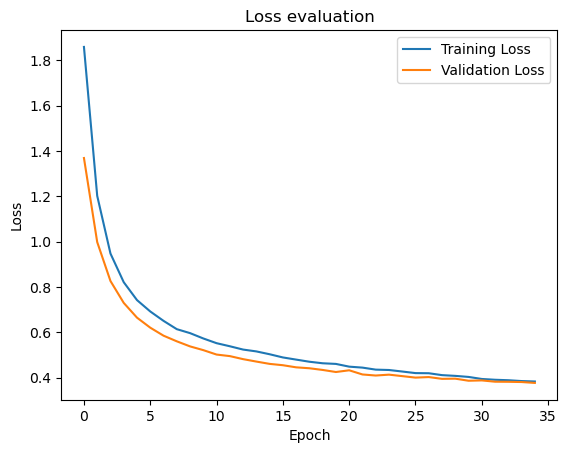

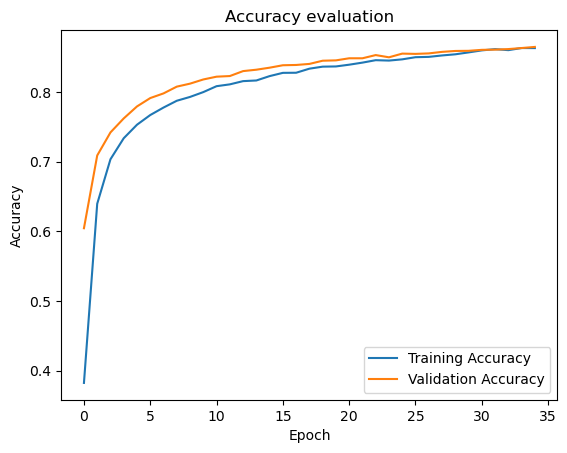

In [24]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)    
lossf = torch.nn.CrossEntropyLoss()
best_vloss = 1_000_000.
epochs = 35
t_loss , t_acc = [], []
v_loss, v_acc = [], []

for epoch in range(epochs):
    train_correct, train_total = 0, 0
    print(f"EPOCH {epoch + 1}/{epochs}")
    model.train()  
    epoch_loss = 0.0

    for data, label in train_loader_mnist:
        data = data.float().to(Device)
        label = label.long().to(Device)

        outputs = model(data)
        loss = lossf(outputs, label)
        
        _, predicted = torch.max(outputs.data, 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_loss = epoch_loss / len(train_loader_mnist)
    train_accuracy = train_correct / train_total
    t_loss.append(train_loss)
    t_acc.append(train_accuracy)
    model.eval()  
    running_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for data, label in val_loader_mnist:
            data = data.float().to(Device)
            label = label.long().to(Device)

            outputs = model(data)
            loss = lossf(outputs, label)
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += label.size(0)
            val_correct += (predicted == label).sum().item()

            running_loss += loss.item()

    val_loss =  running_loss / len(val_loader_mnist)
    val_accuracy = val_correct / val_total
    v_loss.append(val_loss)
    v_acc.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_vloss:
        best_vloss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved Best Model")
    
plt.figure()
plt.plot(t_loss, label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.title('Loss evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_acc, label='Training Accuracy')
plt.plot(v_acc, label='Validation Accuracy')
plt.title('Accuracy evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import classification_report
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 10)
model = model.to(Device)
state_dict = torch.load("best_model.pth")
model.load_state_dict(state_dict)
model.eval()
y_true = []
y_pred = []
labelsforknown = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
with torch.no_grad():
    for test_data in test_loader_mnist:
        test_images, test_labels = (
            test_data[0].to(Device),
            test_data[1].long().to(Device),
        )
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
print(classification_report(y_true, y_pred, target_names=labelsforknown, digits=4))

/tmp/ipykernel_820/2102220127.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("best_model.pth")


              precision    recall  f1-score   support

 T-shirt/top     0.7904    0.8220    0.8059      1000
     Trouser     0.9917    0.9570    0.9740      1000
    Pullover     0.8127    0.7680    0.7897      1000
       Dress     0.8405    0.8800    0.8598      1000
        Coat     0.7700    0.7970    0.7833      1000
      Sandal     0.9659    0.9360    0.9507      1000
       Shirt     0.6719    0.6470    0.6592      1000
     Sneaker     0.9154    0.9300    0.9226      1000
         Bag     0.9598    0.9560    0.9579      1000
  Ankle boot     0.9297    0.9520    0.9407      1000

    accuracy                         0.8645     10000
   macro avg     0.8648    0.8645    0.8644     10000
weighted avg     0.8648    0.8645    0.8644     10000



Deepconvnet peste imagini pt 2

In [1]:
path_fruits = "/home/melidia/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/"

In [2]:
path_mnist = "/home/melidia/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4"

In [3]:
import os
import cv2
import numpy as np

path_fruits_train = path_fruits + "Training"
path_fruits_test = path_fruits + "Test"

number_train = {}
number_test = {}

images_fruits_train = []
images_fruits_test = []
labels_fruits_train = []
labels_fruits_test = []

def process_images(path, images_list, labels_list, number_dict, image_size):
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            if (folder_name.split(" "))[0] not in number_dict:
                number_dict[(folder_name.split(" "))[0]] = 0
            number_dict[(folder_name.split(" "))[0]] += len(files)
            for file in files:
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path, cv2.IMREAD_COLOR)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                    images_list.append(img)
                    labels_list.append((folder_name.split(" "))[0])

process_images(path_fruits_train, images_fruits_train, labels_fruits_train, number_train, (20, 20))

process_images(path_fruits_test, images_fruits_test, labels_fruits_test, number_test, (20, 20))

images_fruits_train = np.array(images_fruits_train)
labels_fruits_train = np.array(labels_fruits_train)
images_fruits_test = np.array(images_fruits_test)
labels_fruits_test = np.array(labels_fruits_test)

print(f"Numărul de imagini pentru antrenare: {len(images_fruits_train)}")
print(f"Numărul de imagini pentru test: {len(images_fruits_test)}")

Numărul de imagini pentru antrenare: 70491
Numărul de imagini pentru test: 23619


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:

from PIL import Image, ImageFilter
from torchvision import transforms

def open_image(path):
    image = Image.open(path)
    return image

transforms_img = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(size=(20, 20), scale=(0.8, 1.0)),
    transforms.RandomRotation(degrees=15),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_img = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [6]:
import torch
import torch.nn as nn

class ConvBlock(nn.Module):
    def __init__(self, num_classes=70):
        super(ConvBlock, self).__init__()
        
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1), 
            nn.BatchNorm2d(16),                                   
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2)                                           
        )
        
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.backbone(x)
        x = self.global_pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = ConvBlock(num_classes=70)
use_cuda = torch.cuda.is_available()
Device = "cuda"
model = model.to(Device)
print(model)


ConvBlock(
  (backbone): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): AvgPool2d(kernel_size=3, stride=2, padding=0)
    (4): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): AvgPool2d(kernel_size=3, stride=2, padding=0)
    (8): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): AvgPool2d(kernel_size=3, stride=2, padding=0)
  )
  (global_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=70, bi

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fruits_y_train_numeric = label_encoder.fit_transform(labels_fruits_train)
fruits_y_test_numeric = label_encoder.transform(labels_fruits_test)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fruits_X_train, fruits_X_test, fruits_y_train, fruits_y_test = train_test_split(images_fruits_train, fruits_y_train_numeric, test_size=0.35, random_state=42, shuffle=True)

In [9]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, image_files, labels, transforms):
        self.image_files = image_files
        self.labels = labels
        self.transforms = transforms
    def __len__(self):
        return len(self.image_files)
    def __getitem__(self, index):
        return self.transforms(self.image_files[index]), self.labels[index]

In [10]:
from torch.utils.data import DataLoader, TensorDataset
import torch

train_dataset_fruits = Dataset(torch.tensor(fruits_X_train).float().permute(0, 3, 1, 2), torch.tensor(fruits_y_train), transforms_img)
val_dataset_fruits = Dataset(torch.tensor(fruits_X_test).float().permute(0, 3, 1, 2), torch.tensor(fruits_y_test), transforms_img)
test_dataset_fruits = Dataset(torch.tensor(images_fruits_test).float().permute(0, 3, 1, 2), torch.tensor(fruits_y_test_numeric), test_img)

train_loader_fruits = DataLoader(train_dataset_fruits, batch_size=64, shuffle=True)
val_loader_fruits = DataLoader(val_dataset_fruits, batch_size=64, shuffle=True)
test_loader_fruits = DataLoader(test_dataset_fruits, batch_size=64, shuffle=True)

EPOCH 1/35
Train Loss: 3.6831, Validation Loss: 3.2199
Saved Best Model
EPOCH 2/35
Train Loss: 2.9931, Validation Loss: 2.7424
Saved Best Model
EPOCH 3/35
Train Loss: 2.6163, Validation Loss: 2.4273
Saved Best Model
EPOCH 4/35
Train Loss: 2.3380, Validation Loss: 2.1722
Saved Best Model
EPOCH 5/35
Train Loss: 2.1099, Validation Loss: 1.9454
Saved Best Model
EPOCH 6/35
Train Loss: 1.9121, Validation Loss: 1.7604
Saved Best Model
EPOCH 7/35
Train Loss: 1.7412, Validation Loss: 1.5984
Saved Best Model
EPOCH 8/35
Train Loss: 1.5943, Validation Loss: 1.4549
Saved Best Model
EPOCH 9/35
Train Loss: 1.4675, Validation Loss: 1.3414
Saved Best Model
EPOCH 10/35
Train Loss: 1.3638, Validation Loss: 1.2305
Saved Best Model
EPOCH 11/35
Train Loss: 1.2613, Validation Loss: 1.1393
Saved Best Model
EPOCH 12/35
Train Loss: 1.1718, Validation Loss: 1.0529
Saved Best Model
EPOCH 13/35
Train Loss: 1.0949, Validation Loss: 0.9743
Saved Best Model
EPOCH 14/35
Train Loss: 1.0212, Validation Loss: 0.9093
Save

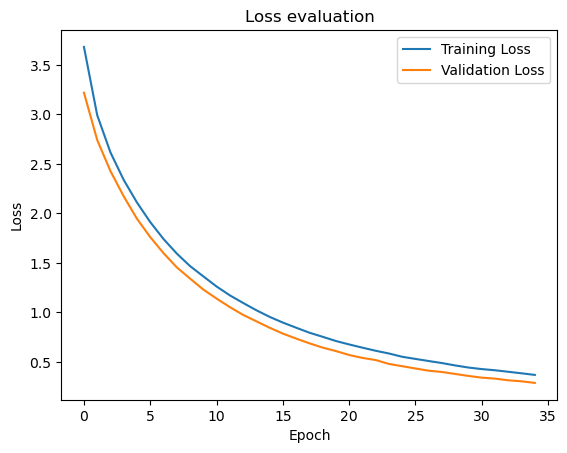

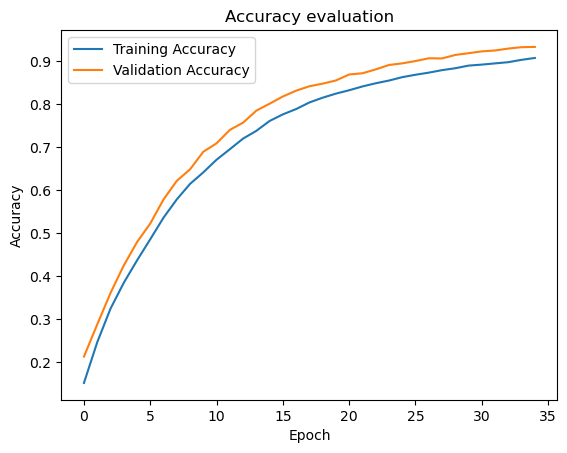

In [11]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
lossf = nn.CrossEntropyLoss()
best_vloss = 1_000_000.
epochs = 35
t_loss , t_acc = [], []
v_loss, v_acc = [], []

for epoch in range(epochs):
    train_correct, train_total = 0, 0
    print(f"EPOCH {epoch + 1}/{epochs}")
    model.train()  
    epoch_loss = 0.0

    for i, (data, label) in enumerate(train_loader_fruits):
        data = data.float().to(Device)
        label = label.long().to(Device)

        outputs = model(data)
        loss = lossf(outputs, label)
        
        _, predicted = torch.max(outputs.data, 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_loss = epoch_loss / len(train_loader_fruits)
    train_accuracy = train_correct / train_total
    t_loss.append(train_loss)
    t_acc.append(train_accuracy)
    model.eval()  
    running_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for i, (data, label) in enumerate(val_loader_fruits):
            data = data.float().to(Device)
            label = label.long().to(Device)

            outputs = model(data)
            loss = lossf(outputs, label)
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += label.size(0)
            val_correct += (predicted == label).sum().item()

            running_loss += loss.item()

    val_loss =  running_loss / len(val_loader_fruits)
    val_accuracy = val_correct / val_total
    v_loss.append(val_loss)
    v_acc.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_vloss:
        best_vloss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved Best Model")
    
plt.figure()
plt.plot(t_loss, label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.title('Loss evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_acc, label='Training Accuracy')
plt.plot(v_acc, label='Validation Accuracy')
plt.title('Accuracy evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import classification_report
model = ConvBlock(num_classes=70).to(Device)
state_dict = torch.load("best_model.pth")
model.load_state_dict(state_dict)
model.eval()
y_true = []
y_pred = []
labelsforknown = label_encoder.classes_
with torch.no_grad():
    for test_data in test_loader_fruits:
        test_images, test_labels = (
            test_data[0].to(Device),
            test_data[1].long().to(Device),
        )
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
print(classification_report(y_true, y_pred, target_names=labelsforknown, digits=4))

/tmp/ipykernel_854/2423494927.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("best_model.pth")


              precision    recall  f1-score   support

       Apple     0.8667    0.9267    0.8957      2525
     Apricot     0.9535    1.0000    0.9762       164
     Avocado     0.9465    0.9741    0.9601       309
      Banana     0.9066    0.7624    0.8283       484
    Beetroot     0.6901    0.7867    0.7352       150
   Blueberry     0.6581    1.0000    0.7938       154
     Cabbage     1.0000    0.6596    0.7949        47
      Cactus     0.7540    0.8494    0.7989       166
  Cantaloupe     0.9877    0.9817    0.9847       328
   Carambula     1.0000    0.8675    0.9290       166
      Carrot     1.0000    1.0000    1.0000        50
 Cauliflower     0.7697    1.0000    0.8699       234
      Cherry     0.9736    0.9634    0.9685      1148
    Chestnut     0.8625    0.4510    0.5923       153
  Clementine     1.0000    1.0000    1.0000       166
       Cocos     1.0000    0.9458    0.9721       166
        Corn     0.8137    0.5461    0.6535       304
    Cucumber     0.9200    

In [13]:
import pandas as pd

path_mnist_train = path_mnist + "/fashion-mnist_train.csv"
real_df_mnist_train = pd.read_csv(path_mnist_train)

path_mnist_test = path_mnist + "/fashion-mnist_test.csv"
real_df_mnist_test = pd.read_csv(path_mnist_test)

label_train = real_df_mnist_train["label"]
label_test = real_df_mnist_test["label"]

df_mnist_train = real_df_mnist_train.drop(columns=["label"])
df_mnist_test = real_df_mnist_test.drop(columns=["label"])

mnist_train = []
mnist_test = []

for i in range(len(df_mnist_train)):
    mnist_train.append(df_mnist_train.iloc[i].values)

for i in range(len(df_mnist_test)):
    mnist_test.append(df_mnist_test.iloc[i].values)
    
import numpy as np

mnist_train = np.array(mnist_train)
mnist_test = np.array(mnist_test)
mnist_train = scaler.fit_transform([i.flatten() for i in mnist_train])
mnist_test = scaler.fit_transform([i.flatten() for i in mnist_test])

/home/melidia/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [14]:
mnist_y_train_tensor = label_train.to_numpy()
mnist_y_test_tensor = label_test.to_numpy()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_train, mnist_y_train_tensor, test_size=0.35, random_state=42, shuffle=True)

In [16]:

from PIL import Image, ImageFilter
from torchvision import transforms

def open_image(path):
    image = Image.open(path)
    return image

transforms_img = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(size=(28, 28), scale=(0.8, 1.0)),
    transforms.RandomRotation(degrees=15),
    transforms.Normalize(mean=[0.485], std=[0.229])
])

test_img = transforms.Compose([
    transforms.Normalize(mean=[0.485], std=[0.229])
])

In [17]:
import torch
class Dataset(torch.utils.data.Dataset):
    def __init__(self, image_files, labels, transforms):
        self.image_files = image_files
        self.labels = labels
        self.transforms = transforms
    def __len__(self):
        return len(self.image_files)
    def __getitem__(self, index):
        return self.transforms(self.image_files[index]), self.labels[index]

In [18]:
from torch.utils.data import DataLoader
train_dataset_mnist = Dataset(torch.tensor(mnist_X_train).float().reshape(-1, 1, 28, 28), torch.tensor(mnist_y_train), transforms_img)
val_dataset_mnist = Dataset(torch.tensor(mnist_X_test).float().reshape(-1, 1, 28, 28), torch.tensor(mnist_y_test), transforms_img)
test_dataset_mnist = Dataset(torch.tensor(mnist_test).float().reshape(-1, 1, 28, 28), torch.tensor(mnist_y_test_tensor), transforms_img)

train_loader_mnist = DataLoader(train_dataset_mnist, batch_size=64, shuffle=True)
val_loader_mnist = DataLoader(test_dataset_mnist, batch_size=64, shuffle=True)
test_loader_mnist = DataLoader(test_dataset_mnist, batch_size=64, shuffle=True)

In [19]:
import torch
import torch.nn as nn

class ConvBlock(nn.Module):
    def __init__(self, num_classes=70):
        super(ConvBlock, self).__init__()
        
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1), 
            nn.BatchNorm2d(16),                                   
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2)                                           
        )
        
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.backbone(x)
        x = self.global_pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = ConvBlock(num_classes=10)
use_cuda = torch.cuda.is_available()
Device = "cuda"
model = model.to(Device)
print(model)


ConvBlock(
  (backbone): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): AvgPool2d(kernel_size=3, stride=2, padding=0)
    (4): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): AvgPool2d(kernel_size=3, stride=2, padding=0)
    (8): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): AvgPool2d(kernel_size=3, stride=2, padding=0)
  )
  (global_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bi

EPOCH 1/35
Train Loss: 1.8940, Validation Loss: 1.5676
Saved Best Model
EPOCH 2/35
Train Loss: 1.3935, Validation Loss: 1.2258
Saved Best Model
EPOCH 3/35
Train Loss: 1.1419, Validation Loss: 1.0412
Saved Best Model
EPOCH 4/35
Train Loss: 1.0054, Validation Loss: 0.9442
Saved Best Model
EPOCH 5/35
Train Loss: 0.9177, Validation Loss: 0.8713
Saved Best Model
EPOCH 6/35
Train Loss: 0.8624, Validation Loss: 0.8241
Saved Best Model
EPOCH 7/35
Train Loss: 0.8204, Validation Loss: 0.7935
Saved Best Model
EPOCH 8/35
Train Loss: 0.7878, Validation Loss: 0.7612
Saved Best Model
EPOCH 9/35
Train Loss: 0.7643, Validation Loss: 0.7341
Saved Best Model
EPOCH 10/35
Train Loss: 0.7447, Validation Loss: 0.7213
Saved Best Model
EPOCH 11/35
Train Loss: 0.7268, Validation Loss: 0.7048
Saved Best Model
EPOCH 12/35
Train Loss: 0.7122, Validation Loss: 0.6880
Saved Best Model
EPOCH 13/35
Train Loss: 0.7008, Validation Loss: 0.6844
Saved Best Model
EPOCH 14/35
Train Loss: 0.6873, Validation Loss: 0.6698
Save

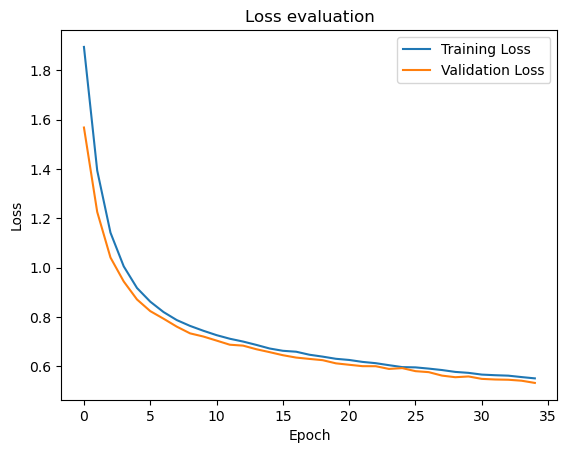

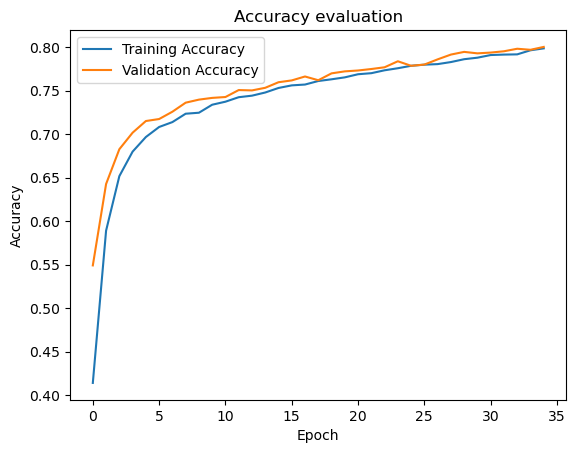

In [20]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
lossf = nn.CrossEntropyLoss()
best_vloss = 1_000_000.
epochs = 35
t_loss , t_acc = [], []
v_loss, v_acc = [], []

for epoch in range(epochs):
    train_correct, train_total = 0, 0
    print(f"EPOCH {epoch + 1}/{epochs}")
    model.train()  
    epoch_loss = 0.0

    for data, label in train_loader_mnist:
        
        data = data.float().to(Device)
        label = label.long().to(Device)

        
        outputs = model(data)
        loss = lossf(outputs, label)
        
        _, predicted = torch.max(outputs.data, 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_loss = epoch_loss / len(train_loader_mnist)
    train_accuracy = train_correct / train_total
    t_loss.append(train_loss)
    t_acc.append(train_accuracy)
    model.eval()  
    running_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for data, label in val_loader_mnist:
            data = data.float().to(Device)
            label = label.long().to(Device)

            outputs = model(data)
            loss = lossf(outputs, label)
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += label.size(0)
            val_correct += (predicted == label).sum().item()

            running_loss += loss.item()

    val_loss =  running_loss / len(val_loader_mnist)
    val_accuracy = val_correct / val_total
    v_loss.append(val_loss)
    v_acc.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_vloss:
        best_vloss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved Best Model")
    
plt.figure()
plt.plot(t_loss, label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.title('Loss evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_acc, label='Training Accuracy')
plt.plot(v_acc, label='Validation Accuracy')
plt.title('Accuracy evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import classification_report
model = model = ConvBlock(num_classes=10).to(Device)
state_dict = torch.load("best_model.pth")
model.load_state_dict(state_dict)
model.eval()
y_true = []
y_pred = []
labelsforknown = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
with torch.no_grad():
    for test_data in test_loader_mnist:
        test_images, test_labels = (
            test_data[0].to(Device),
            test_data[1].long().to(Device),
        )
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
print(classification_report(y_true, y_pred, target_names=labelsforknown, digits=4))

/tmp/ipykernel_854/3098396568.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("best_model.pth")


              precision    recall  f1-score   support

 T-shirt/top     0.7402    0.7780    0.7587      1000
     Trouser     0.9724    0.9500    0.9611      1000
    Pullover     0.6853    0.6730    0.6791      1000
       Dress     0.8013    0.8670    0.8329      1000
        Coat     0.6908    0.7530    0.7206      1000
      Sandal     0.8887    0.9180    0.9031      1000
       Shirt     0.4907    0.3970    0.4389      1000
     Sneaker     0.8705    0.8470    0.8586      1000
         Bag     0.9480    0.9290    0.9384      1000
  Ankle boot     0.8993    0.9200    0.9095      1000

    accuracy                         0.8032     10000
   macro avg     0.7987    0.8032    0.8001     10000
weighted avg     0.7987    0.8032    0.8001     10000

